# Numpy Exercises

In [2]:
import numpy as np
%matplotlib inline

## 1. Array manipulations

#### Form this 2-D array (without typing it in explicitly):

`[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]`


In [7]:
a = np.array(np.arange(1,6))[:, np.newaxis] + np.array(np.arange(0, 11, 5))
a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

and generate a new array containing its 2nd and 4th rows:

In [9]:
b = a[[1, 3], :]
b

array([[ 2,  7, 12],
       [ 4,  9, 14]])

#### Divide each *row* of the array a elementwise with the array b. (Hint: np.newaxis).

In [10]:
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [11]:
b = np.array([1., 5, 10, 15, 20])
b

array([ 1.,  5., 10., 15., 20.])

In [16]:
c = a / b # This raises a ValueError. Fix it.
c

array([[0.        , 1.        , 2.        , 3.        ],
       [0.8       , 1.        , 1.2       , 1.4       ],
       [0.8       , 0.9       , 1.        , 1.1       ],
       [0.8       , 0.86666667, 0.93333333, 1.        ],
       [0.8       , 0.85      , 0.9       , 0.95      ]])

#### Harder one: Generate a 10 x 3 array of random numbers (in range [0,1]). For each row, pick the number closest to 0.5.

Let's start by creating the array:
* Use the random() function in module np.random

In [18]:
a = np.random.rand(10,3)
a

array([[0.27006683, 0.97165148, 0.75323653],
       [0.90213157, 0.83030048, 0.27145852],
       [0.0661583 , 0.47437611, 0.6869058 ],
       [0.60290588, 0.57732333, 0.80572151],
       [0.78427104, 0.60589384, 0.29870129],
       [0.94892855, 0.31058769, 0.29365647],
       [0.60166047, 0.31573948, 0.44621572],
       [0.26071433, 0.95447183, 0.04532825],
       [0.84657717, 0.22489201, 0.67991392],
       [0.14083047, 0.37461717, 0.25512634]])

Get the index of the closes value for each row and store the indices in j.
   * Use `abs` and `argmin`

In [23]:
j = np.abs(a-0.5).argmin(axis=1)
j

array([0, 2, 1, 1, 1, 1, 2, 0, 2, 1])

Now get the indices for the rows. Since we are picking a number in each row this is just a list with all row indices.
 * range()

In [24]:
i = range(len(j))
i

range(0, 10)

Now we can use fancy indexing to print out the items a that are indexed by `i` and `j`:

In [25]:
a[i, j]

array([0.27006683, 0.27145852, 0.47437611, 0.57732333, 0.60589384,
       0.31058769, 0.44621572, 0.26071433, 0.67991392, 0.37461717])

# 2. Hares, lynxes and carrots

Let's work again with the population data of hares and lynxes.

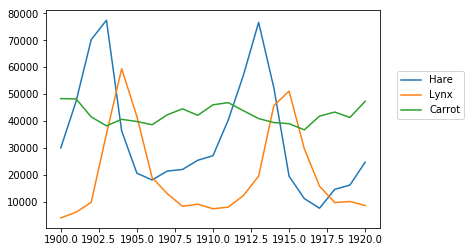

['Hare', 'Lynx', 'Carrot']
[[30000.  4000. 48300.]
 [47200.  6100. 48200.]
 [70200.  9800. 41500.]
 [77400. 35200. 38200.]
 [36300. 59400. 40600.]
 [20600. 41700. 39800.]
 [18100. 19000. 38600.]
 [21400. 13000. 42300.]
 [22000.  8300. 44500.]
 [25400.  9100. 42100.]
 [27100.  7400. 46000.]
 [40300.  8000. 46800.]
 [57000. 12300. 43800.]
 [76600. 19500. 40900.]
 [52300. 45700. 39400.]
 [19500. 51100. 39000.]
 [11200. 29700. 36700.]
 [ 7600. 15800. 41800.]
 [14600.  9700. 43300.]
 [16200. 10100. 41300.]
 [24700.  8600. 47300.]]
[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]


In [27]:
data = np.loadtxt('data/populations.txt')
year, populations = data[:, 0], data[:, 1:]
names = ['Hare', 'Lynx', 'Carrot']

import matplotlib.pyplot as plt
plt.plot(year, populations) 
plt.legend(names, loc=(1.05, 0.5))
plt.show()

print(names)
print(populations)
print(year)

#### For each year, print which species had the highest population.

First, find the column indices:

In [29]:
ind = populations.argmax(axis=1)
ind

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

Now, print the name of the species for each index in `ind`.

* Either loop though `ind` and lookup the words in list `names` 
* or convert `names` to an array and use indexing

In [34]:
for s in ind:
    print(names[s])

Carrot
Carrot
Hare
Hare
Lynx
Lynx
Carrot
Carrot
Carrot
Carrot
Carrot
Carrot
Hare
Hare
Hare
Lynx
Carrot
Carrot
Carrot
Carrot
Carrot


#### Find the years any of the populations is above 50000?
 * comparison, np.any, np.where

In [40]:
inds = np.where(np.any(populations > 50000, axis=1))
inds

(array([ 2,  3,  4, 12, 13, 14, 15]),)

In [44]:
high_years = year[inds]
high_years

array([1902., 1903., 1904., 1912., 1913., 1914., 1915.])

## 3. Rock, Paper, Scissors, Lizard, Spock 

Let's extend our previous game of Rock, Paper, Scissors to Rock, Paper, Scissors, Lizard, Spock. 

The rules are shown in this figure:

<img src="images/rpsls.jpg" style="width: 400px;"/>

In the Rock-Paper-Scissors game we decided the winner by going through a few nested if/then/else clauses. The structure of our code resembled a *tree*. 

We could do the same for the extended version but there might be a better way represent the game rules than in form of a decision tree. Especially if we think of even more complicated versions of the game like this one here:

<img src="images/rpslssb.jpg" style="width: 600px;"/>

Often in programming the way you represent data changes the difficulty of a problem. Thinking about how to represent the problem is often the most important part in solving it.

As you can see here, the rules are represented as a *graph*. Each possible choice is a *node* and each *edge* tells us who wins.

One way to store a graph is by using a so-called *adjaceny matrix*. Each item `(i,j)` in this matrix represent an edge between node `i` and `j`.

**Write a new version of the previous `decide_winner` function that is able handle extended versions of Rock-Paper-Scissors.**

First step is to encode the above graphs as an adjaceny matrix using a 2D numpy array. Have a look at this figure to get an idea what this looks like:

<img src="images/rpsls_alt.png" style="width: 400px;"/>

Think of the colors as numbers.

In [55]:
# Data for Rock, Paper, Scissors, Lizard, Spock
rules = np.array([[-1,  1, -1,  1,  0],
                  [ 1, -1,  1,  0, -1],
                  [ 1, -1,  0, -1,  1],
                  [-1,  0,  1,  1, -1],
                  [ 0,  1, -1, -1,  1]])

choices = ['rock', 'paper', 'scissors', 'lizard', 'spock']
str2ind = dict(zip(choices, range(len(choices))))
str2ind

{'rock': 0, 'paper': 1, 'scissors': 2, 'lizard': 3, 'spock': 4}

In [61]:
def decide_winner(player1, player2, rules):
    """ Returns -1 if player 1 wins, 1 if player 2 wins and 0 if it's a tie."""
    
    p1 = player1.lower()
    p2 = player2.lower()
    
    return rules[4-str2ind[p2], str2ind[p1]]
    

In [64]:
decide_winner('rock', 'spock', rules)

-1